In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score


df_train = pd.read_csv('data/train.csv')
df_train.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000
5,1965,535453150,20,RL,70.0,7315,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,140000
6,681,535452090,20,RL,71.0,7350,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,3,2009,WD,Normal,128000
7,1566,914467050,60,RL,NaN,11050,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,213000
8,419,527455240,20,RL,65.0,7150,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,100000
9,2346,527327080,60,RL,NaN,18800,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,190000


In [2]:
df_train.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2197.000000,2.197000e+03,2197.000000,1835.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2175.000000,...,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000
mean,1460.512517,7.127872e+08,57.064178,69.549319,10268.070096,6.116523,5.552572,1972.030951,1984.781065,105.101609,...,92.436959,48.768320,22.393719,2.361402,15.954028,2.789713,57.404188,6.189804,2007.793810,182376.851161
std,846.537251,1.887751e+08,42.360690,23.188224,7975.740885,1.429613,1.107019,30.450069,20.898245,184.897165,...,121.422842,69.127588,62.063281,22.843004,56.495484,39.991010,639.103790,2.746902,1.314345,81168.157405
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,13100.000000
25%,733.000000,5.284410e+08,20.000000,58.500000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,1452.000000,5.354532e+08,50.000000,69.000000,9488.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,2196.000000,9.071811e+08,70.000000,80.000000,11660.000000,7.000000,6.000000,2002.000000,2004.000000,166.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,2929.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,870.000000,742.000000,584.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Dealing with nulls

In [3]:
for col in df_train:
    if df_train[col].isnull().sum() > 0:
        try:
            df_train[col].fillna(df_train[col].mean(), inplace = True)
        except:
            df_train[col].fillna(df_train[col].mode()[0],inplace = True)

In [4]:
df_train

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.000000,9605,Pave,Grvl,Reg,Lvl,...,0,Ex,MnPrv,Shed,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.000000,14684,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Shed,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,69.549319,14375,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Shed,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.000000,6472,Pave,Grvl,Reg,Lvl,...,0,Ex,MnPrv,Shed,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.000000,9734,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Shed,0,5,2009,WD,Normal,167000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2764,906420020,60,RL,80.000000,10041,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,220000
2193,906,909129090,50,RH,70.000000,6300,Pave,Pave,Reg,Lvl,...,0,Ex,MnPrv,Shed,0,7,2009,WD,Abnorml,160000
2194,1097,528292060,60,RL,41.000000,12460,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Shed,0,5,2008,WD,Normal,225000
2195,236,905426060,30,RL,85.000000,10625,Pave,Grvl,Reg,Lvl,...,0,Ex,MnPrv,Shed,400,5,2010,COD,Abnorml,83000


In [7]:
# prepare for experiment, only numeric X's
numeric_cols = df_train.columns[df_train.dtypes != 'object']

# drop y
numeric_cols = numeric_cols.drop('SalePrice')

# drop "too good" X's
# numeric_cols = numeric_cols.drop('MPG.highway')

# drop X cols with nulls
cols_with_nulls = numeric_cols[df_train[numeric_cols].isnull().sum(axis=0) > 0]
numeric_cols = numeric_cols.drop(cols_with_nulls)

cols = numeric_cols.to_list()

cols

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

### Start of training/testing

In [9]:
#spliting for test/train
X = df_train[cols]
y = df_train['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1537, 38), (660, 38), (1537,), (660,))

In [13]:
#create the random forest model
model =  RandomForestRegressor(n_estimators = 100, random_state =42) 

In [14]:
param_grid = {'max_depth': [4, 10, 15, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}



In [17]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2,verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 10, 15, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [57]:
model = RandomForestRegressor(**grid_search.best_params_, n_estimators=1000)

#fitting the model
fitModel = model.fit(X_train, y_train)

#checking the score
score = model.score(X_test, y_test)
print("Model score:", score)

Model score: 0.8518575717585248


In [58]:
print("Best hyperparameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.8710769965069796


In [53]:
#The training r_sq
print("score:%.2f" %fitModel.score(X_train,y_train))

score:0.98


In [54]:
#Prediction on training dataset
y_trainPred = fitModel.predict(X_train)
print("mae: %.2f" %mean_absolute_error(y_train,y_trainPred))

mae: 7565.94


#### Predictions on test data

In [55]:
y_testPred = fitModel.predict(X_test)
y_testPred[:10]

array([204001.94825937, 147357.14526569, 229437.24663982, 139534.58732384,
       108229.53445279, 283763.34611225, 255900.63006117, 221380.56401308,
       134009.797661  , 256906.77541913])

In [56]:
print("R_sq:%.2f" %r2_score(y_test,y_testPred))

R_sq:0.85


In [33]:
#OR
print("R_sq:%.2f" %fitModel.score(X_test,y_test))

R_sq:0.85


In [34]:
print("mse: %.2f" %mean_squared_error(y_test,y_testPred))

mse: 983344478.60


In [35]:
print("evs: %.2f" %explained_variance_score(y_test,y_testPred))

evs: 0.85


### Visualization Trial

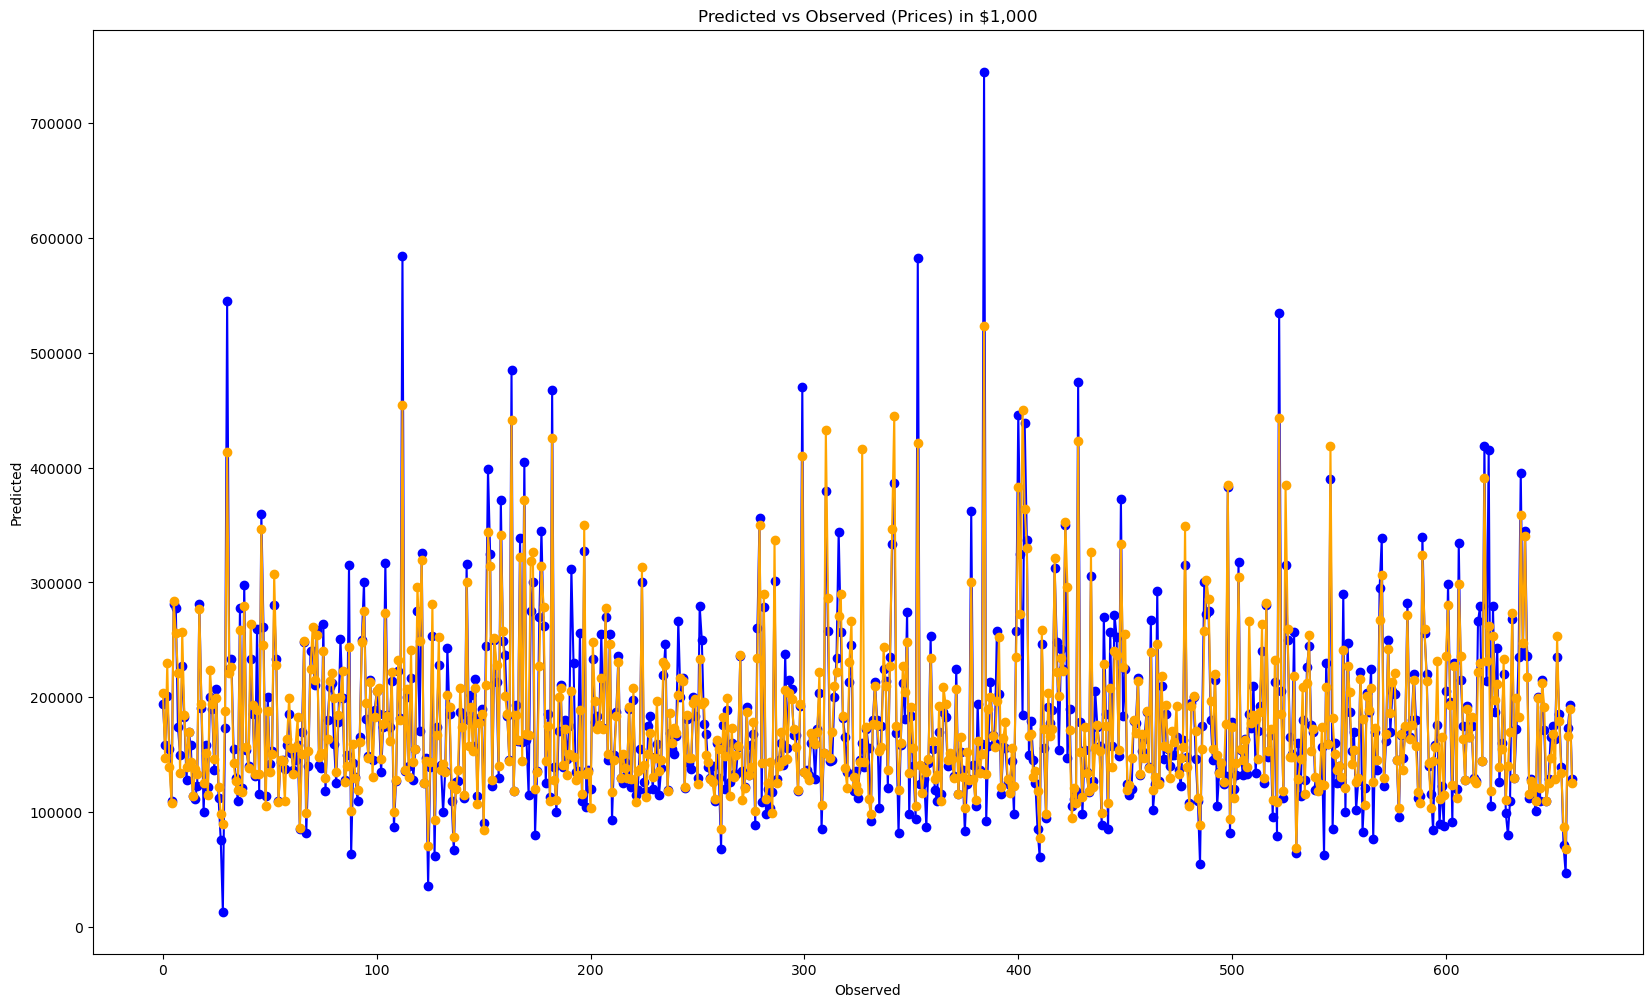

In [61]:
#setting boundaries and parameters
plt.rcParams['figure.figsize'] = (20,12)
x_ax = range(len(X_test))
# plt.plot( linestyle='--', marker='o', color='b', label='line with marker')

#plotting
plt.plot(x_ax,y_test,label='Observed',marker = 'o',color = 'blue',linestyle='-')
plt.plot(x_ax,y_testPred,label='Predicted',marker = 'o',color = 'orange',linestyle='-')

#adding labeels
plt.title('Predicted vs Observed (Prices) in $1,000')
# Set x-axis label
plt.xlabel('Observed')
# Set y-axis label
plt.ylabel('Predicted')

plt.show()


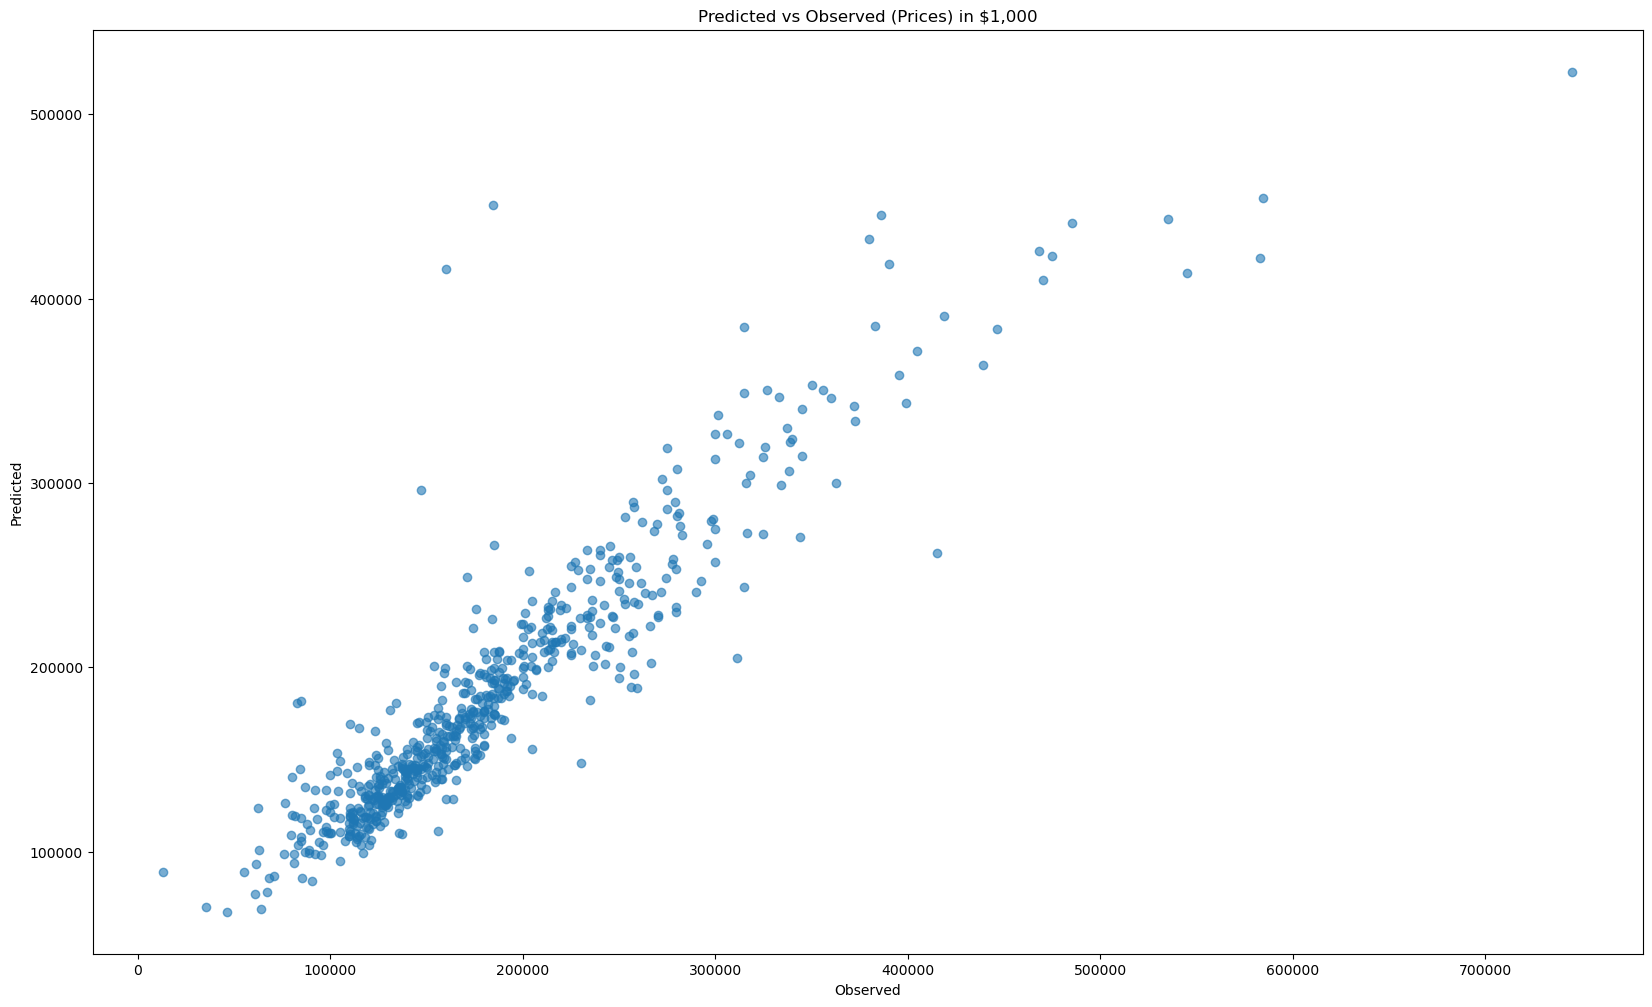

In [63]:
plt.scatter(x = y_test, y = y_testPred ,label='Prediction vs Observed',marker='o',alpha = 0.6)

#adding labeels
plt.title('Predicted vs Observed (Prices) in $1,000')
# Set x-axis label
plt.xlabel('Observed')
# Set y-axis label
plt.ylabel('Predicted')

plt.show()